<a href="https://colab.research.google.com/github/BOYOUNG12345/puying/blob/main/Credit_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#파일 읽기
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**EDA & 전처리**

In [72]:
train.info() #19개 feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  int64  
 18  begin_

In [73]:
test.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2,-60
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2,-36
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2,-40


In [74]:
test.info() #credit 제외 18개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  int64  
 18  begin_m

In [75]:
#머신러닝 알고리즘에 불필요한 변수 제거 (Train, Test 둘다)
train= train.drop(['FLAG_MOBIL', 'index'], axis=1)
test= test.drop(['FLAG_MOBIL', 'index'], axis=1)

In [76]:
#결측치 제거
print(train['occyp_type'].isnull().sum())
print(test['occyp_type'].isnull().sum())

train['occyp_type']= train['occyp_type'].fillna('Jobless')
test['occyp_type']= test['occyp_type'].fillna('Jobless')

8171
3152


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     26457 non-null  object 
 15  family_size    26457 non-null  int64  
 16  begin_month    26457 non-null  int64  
 17  credit         26457 non-null  int64  
dtypes: flo

In [78]:
#DAYS_BIRTH Feature로 새로운 'age'column 생성
train['age'] = (-1*train['DAYS_BIRTH']//365) +1
print(train['age'].describe())

test['age'] = (-1*test['DAYS_BIRTH']//365) +1
print(test['age'].describe())

count    26457.000000
mean        44.213478
std         11.513590
min         22.000000
25%         35.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: age, dtype: float64
count    10000.000000
mean        44.384300
std         11.501663
min         21.000000
25%         35.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: age, dtype: float64


In [79]:
#Group 별 연령 column 추가 (age_group) 20대: 2, 30대: 3, 40대: 4, 50대: 5, 60대 :6
#train
train['age_group']= train['age']//10
train['age_group'].value_counts()

#test
test['age_group']= test['age']//10
test['age_group'].value_counts()

3    2799
4    2649
5    2195
6    1295
2    1062
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Number of Ages per Age Group')

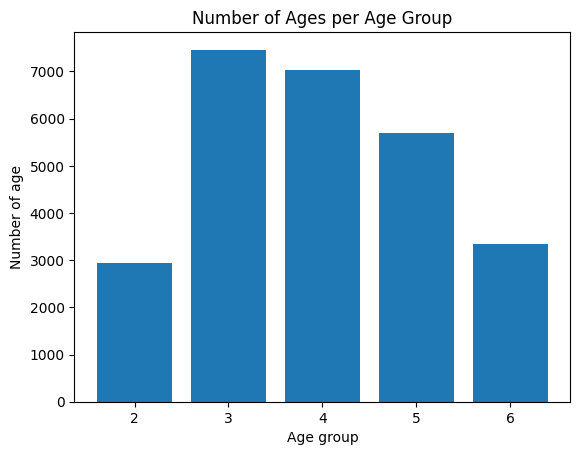

In [80]:
#연령별 Bar 그래프
import matplotlib.pyplot as plt
age_group_bar =train['age_group'].value_counts().sort_index()
plt.bar(age_group_bar.index, age_group_bar.values)
plt.xlabel('Age group')
plt.ylabel('Number of age')
plt.title('Number of Ages per Age Group')
#30-40대 데이터가 많이 있음

In [81]:
#신용카드 사용 개월 수 column 추가
#train
train ['used_month'] = -1*train['begin_month']
print(train['used_month'].describe())

#test
test ['used_month'] = -1*test['begin_month']
print(test['used_month'].describe())

count    26457.000000
mean        26.123294
std         16.559550
min          0.000000
25%         12.000000
50%         24.000000
75%         39.000000
max         60.000000
Name: used_month, dtype: float64
count    10000.000000
mean        26.272400
std         16.348557
min          0.000000
25%         12.000000
50%         25.000000
75%         39.000000
max         60.000000
Name: used_month, dtype: float64


In [82]:
#신용카드 사용 연수 column 5개 그룹으로 만들기
#0: 1년 이하 1: 1년, 2: 2년, 3:3년, 4:4년 이상
#train
train['used_year']= train['used_month']//12
print(train['used_year'].value_counts())
train['used_year']= train['used_year'].replace(5, 4)
print(train['used_year'].value_counts())

#test
test['used_year']= test['used_month']//12
print(test['used_year'].value_counts())
test['used_year']= test['used_year'].replace(5, 4)
print(test['used_year'].value_counts())


0    6488
1    6322
2    5377
3    4643
4    3392
5     235
Name: used_year, dtype: int64
0    6488
1    6322
2    5377
3    4643
4    3627
Name: used_year, dtype: int64
1    2466
0    2331
2    2102
3    1739
4    1276
5      86
Name: used_year, dtype: int64
1    2466
0    2331
2    2102
3    1739
4    1362
Name: used_year, dtype: int64


# **피처엔지니어링**

In [85]:
#수치형
#StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train['income_total'] = scaler.fit_transform(train['income_total'])
test['income_total'] = scaler.transform(test['income_total'])


ValueError: ignored

In [31]:
#Test 1
#라벨인코딩
from sklearn.preprocessing import LabelEncoder

cols = train.select_dtypes(include = 'object').columns
print(cols)

for col in cols:
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'occyp_type'],
      dtype='object')


In [ ]:
#Test 2
#get_dummies

cols = train.select_dtypes(include = 'object').columns
print(cols)

train = pd.get_dummies(train, columns =cols )
test = pd.get_dummies(test, columns=cols)

In [ ]:
#Test 3
#OneHOT Encoding

from sklearn.preprocessing import OneHotEncoder

cols = train.select_dtypes(include = 'object').columns
print(cols)

for col in cols:
  ohe = OneHotEncoder()
  train[col] = ohe.fit_transform(train[col])
  test[col] = ohe.transform(test[col])


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   family_type    26457 non-null  int64  
 8   house_type     26457 non-null  int64  
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     26457 non-null  int64  
 15  family_size    26457 non-null  int64  
 16  begin_month    26457 non-null  int64  
 17  credit         26457 non-null  int64  
 18  age   

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  int64  
 1   car            10000 non-null  int64  
 2   reality        10000 non-null  int64  
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  int64  
 6   edu_type       10000 non-null  int64  
 7   family_type    10000 non-null  int64  
 8   house_type     10000 non-null  int64  
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  work_phone     10000 non-null  int64  
 12  phone          10000 non-null  int64  
 13  email          10000 non-null  int64  
 14  occyp_type     10000 non-null  int64  
 15  family_size    10000 non-null  int64  
 16  begin_month    10000 non-null  int64  
 17  age            10000 non-null  int64  
 18  age_gro

# **검증 데이터 분리**

In [37]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    train.drop('credit', axis=1), train['credit'], test_size=0.2, random_state =2023
)


In [38]:
X_tr.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,age,age_group,used_month,used_year
25163,0,0,1,0,157500.0,1,4,1,1,-20578,...,0,1,0,8,2,-13,57,5,13,1
3761,1,1,0,0,180000.0,0,4,1,2,-9810,...,1,0,0,8,2,-16,27,2,16,1
10123,0,0,0,0,270000.0,0,1,1,1,-14953,...,1,1,0,11,2,-3,41,4,3,0
23062,0,1,1,0,247500.0,0,4,1,1,-17958,...,0,0,0,4,2,-52,50,5,52,4
11175,0,0,0,0,157500.0,1,4,3,2,-21471,...,0,0,0,8,1,-2,59,5,2,0


# **`*모델 & 평가 *`**

In [62]:
#Model 1 - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model1= RandomForestClassifier(random_state=2023)
model1.fit(X_tr, y_tr)
pred1= model1.predict(X_val)

In [63]:
#Model 2 - LightGBM
import lightgbm as lgb

model2=lgb.LGBMClassifier()
model2.fit(X_tr, y_tr)
pred2 = model2.predict(X_val)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 21
[LightGBM] [Info] Start training from score -2.113514
[LightGBM] [Info] Start training from score -1.437327
[LightGBM] [Info] Start training from score -0.443751


In [44]:
train['credit'].value_counts()

2    16968
1     6267
0     3222
Name: credit, dtype: int64

In [40]:
pred1

array([2, 2, 2, ..., 2, 2, 1])

# **평가**

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#정확도
print('RandomForestClassifier ', accuracy_score(y_val, pred1))
print('LightGBM', accuracy_score(y_val, pred2))
#정밀도
print('RandomForestClassifier', precision_score(y_val, pred1, average = 'macro'))
print('LightGBM', precision_score(y_val, pred2, average = 'macro'))
#재현율 (민감도)
print('RandomForestClassifier', recall_score(y_val, pred1, average = 'macro'))
print('LightGBM', recall_score(y_val, pred2, average = 'macro'))
#F1
print('RandomForestClassifier', f1_score(y_val, pred1, average = 'macro'))
print('LightGBM', f1_score(y_val, pred2, average = 'macro'))

RandomForestClassifier 0.7074829931972789
LightGBM 0.7031368102796675
RandomForestClassifier 0.6090500451113582
LightGBM 0.7338765554521028
RandomForestClassifier 0.5053500176645096
LightGBM 0.4344676359152071
RandomForestClassifier 0.5263214467583708
LightGBM 0.4317848730289054
